Study evolution of correlation between companies over time

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from matplotlib.dates import AutoDateLocator, DateFormatter, datestr2num


warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

path='drive/MyDrive//MUIA/TFM/Code/TDA_Stocks_Spain-main/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# DateFilter returns stocks from start_date (finish-time) to finish_date
def DateFilter (time, finish_date_str, show=False):
    # convert date column to datetime format
    stocks_spain['Date'] = pd.to_datetime(stocks_spain['Date'])
    
    if type(finish_date_str) == str:
        finish_date = datetime.strptime(finish_date_str, '%Y-%m-%d')
    else:
        finish_date = finish_date_str
    
    start_date = finish_date - timedelta(days=time)
    # filter the dataframe to keep rows before and after the filter date 
    stocks_filter = stocks_spain[(stocks_spain['Date'] <= finish_date) & (stocks_spain['Date'] >= start_date)]

    # print the resulting dataframe
    if show==True:
        print(f'Start date: {start_date}')
        print(f'Finish date: {finish_date}')
        
    return stocks_filter, start_date, finish_date

In [35]:
#reads the csv
stocks_spain = pd.read_excel(f'{path}data/stocks_spain.xlsx')
stocks_spain.drop(columns=stocks_spain.columns[0], axis=1, inplace=True)
stocks_spain

,Date,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
0,2018-01-02,8.710,60.220001,48.349998,11.220,32.255001,170.500000,8.348511,7.953,7.082,...,1.655001,1.660000,5.226751,2.500,8.191,9.400,4.397,1.2900,66.521370,54.700001
1,2018-01-03,8.665,60.500000,49.299999,11.230,32.470001,172.399994,8.539362,7.964,7.094,...,1.676181,1.920000,5.227709,2.459,8.166,9.432,4.430,1.3100,66.286316,55.000000
2,2018-01-04,8.770,61.820000,49.750000,11.430,33.490002,175.399994,8.612767,8.082,7.221,...,1.717063,1.960000,5.403084,2.553,8.295,9.574,4.470,1.3200,66.286316,55.599998
3,2018-01-05,8.865,63.500000,50.299999,11.570,33.939999,177.350006,8.563830,8.140,7.253,...,1.738736,2.040000,5.438543,2.572,8.358,9.830,4.450,1.3150,66.599724,56.500000
4,2018-01-08,8.750,62.959999,49.700001,11.540,33.650002,178.250000,8.632341,8.124,7.235,...,1.729870,2.270000,5.454834,2.600,8.370,9.570,4.405,1.3070,66.443016,56.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,2023-03-14,3.466,60.459999,44.849998,7.580,28.709999,153.199997,8.735000,6.098,6.690,...,1.139000,17.540001,3.445500,2.928,3.811,3.098,3.190,1.0890,95.699997,65.599998
1332,2023-03-15,3.380,58.160000,44.450001,7.310,28.030001,145.949997,8.670000,5.704,6.048,...,1.019500,16.830000,3.208000,2.828,3.753,3.052,3.065,1.0230,94.000000,66.199997
1333,2023-03-16,3.380,59.400002,44.799999,7.410,28.469999,148.449997,8.815000,5.560,6.254,...,1.014500,17.040001,3.291500,2.852,3.722,3.062,3.075,1.0050,95.099998,66.800003
1334,2023-03-17,3.346,58.320000,45.299999,7.280,28.160000,142.399994,8.735000,5.420,6.036,...,0.982600,16.885000,3.138500,2.792,3.702,3.022,3.025,0.9875,94.199997,66.550003


In [71]:
time = 100
dates = pd.to_datetime(stocks_spain['Date'][time:])

correlation_list = []
v = True
for date in dates:
    stocks_filter_2, start_date, finish_date = DateFilter (time, finish_date_str = date)
    if v == True:
      print(stocks_filter_2)
      print(start_date)
      print(finish_date)
      print('---')
      v = False
    # Calculate returns
    logreturn = np.log(stocks_filter_2.iloc[:,1:]).diff()
    logreturn = logreturn.iloc[1: , :]
    
    #craetes a correlation matrix
    corr_matrix = logreturn.corr()
    
    # Calculate the sum of all correlation coefficients, excluding the diagonal
    sum_corr = sum(corr_matrix.values.flatten()) - len(corr_matrix)

    # Calculate the total number of correlation coefficients, excluding the diagonal
    n_corr = len(corr_matrix)*(len(corr_matrix)-1)

    # Calculate the mean correlation
    mean_corr = sum_corr/n_corr

    #print(f"On date '{date}' the mean correlation between all companies is: {mean_corr}")
    correlation_list.append(mean_corr)

          Date    A3M        AMS        ALB   APPS        ACS        AENA  \
31  2018-02-14  8.640  58.560001  49.400002  10.74  28.370001  165.649994   
32  2018-02-15  8.710  58.959999  49.700001  10.91  28.600000  165.649994   
33  2018-02-16  8.800  59.459999  49.650002  11.03  28.750000  167.500000   
34  2018-02-19  8.725  59.220001  49.250000  10.82  28.490000  165.949997   
35  2018-02-20  8.720  59.500000  49.900002  11.00  29.129999  166.899994   
..         ...    ...        ...        ...    ...        ...         ...   
96  2018-05-21  8.170  66.599998  50.200001  11.63  37.000000  171.000000   
97  2018-05-22  8.160  66.440002  49.900002  11.68  37.020000  170.899994   
98  2018-05-23  8.310  66.459999  50.400002  11.54  36.700001  169.449997   
99  2018-05-24  8.180  66.800003  50.200001  11.56  36.290001  169.050003   
100 2018-05-25  7.905  67.379997  50.299999  11.59  35.669998  165.550003   

           ALM    BKT   BBVA  ...       SAB    SLR       SAN   SCYR    TEF 

In [57]:
print(dates.values)

['2018-05-25T00:00:00.000000000' '2018-05-28T00:00:00.000000000'
 '2018-05-29T00:00:00.000000000' ... '2023-03-16T00:00:00.000000000'
 '2023-03-17T00:00:00.000000000' '2023-03-20T00:00:00.000000000']


In [58]:
# Define critical dates based on TDA
critical_dates = ['2020-03-24T00:00:00.000000000', '2020-11-16T00:00:00.000000000']

# Convert critical_dates to matplotlib-compatible format
critical_dates_num = [datestr2num(date) for date in critical_dates]

In [83]:
# Iterate over critical_dates and print the corresponding correlation values

for critical_date in critical_dates:
  # Convert critical date to numpy datetime64
  critical_date = np.datetime64(critical_date)

  # Check if critical date is on dates and get the index
  if critical_date in dates.values:
      index = dates[dates == critical_date].idxmax()
      print(index)
      # Adjust the index because delay on correlation list
      index = index - time
      correlation_value = correlation_list[index]
      print(f"Correlation value on {critical_date}: {correlation_value}")
  else:
      print(f"No correlation value available for {critical_date}")




568
Correlation value on 2020-03-24T00:00:00.000000000: 0.5308466432662775
734
Correlation value on 2020-11-16T00:00:00.000000000: 0.2879617218225629


18345.0
18582.0


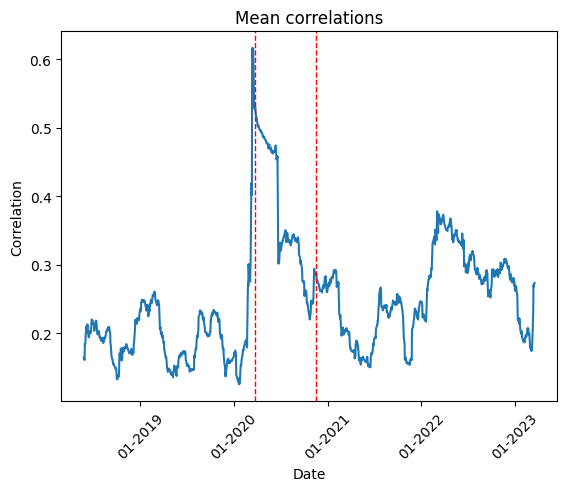

In [82]:
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter, datestr2num



# Plot the mean correlation over time
fig, ax = plt.subplots()
ax.plot(dates, correlation_list)

date_locator = AutoDateLocator()
date_formatter = DateFormatter('%m-%Y')
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_tick_params(rotation=45)

# Set the plot title
ax.set_title('Mean correlations')
ax.set_xlabel('Date')
ax.set_ylabel('Correlation')

# Plot vertical red dot lines for critical dates
for critical_date in critical_dates_num:
  ax.axvline(x=critical_date, color='red', linestyle='--', linewidth=1)

plt.show()
